# Problem 2: Linear Discriminative Analysis

## 2.2 implement GaussianDiscAnalysis class, fit the model with breast cancer data (using the first two features), plot the testing data and the decision boundary

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [20]:
class GaussianDiscAnalysis:
    """
    Fits a Linear Discriminant Analysis Model for binary class

    """

    def compute_phi(self, y):
        """
        calculate prior probability of positive class: P(Y=1)
        :param y: matrix of nx1
        :return: the prior probability
        """
        return y[y==1].shape[0]/y.shape[0]
    
    def compute_mu(self, X, y):
        """
        compute Mu for the positive class and negative class
        :param X: matrix of nxd  (n is sample size and d is number of features)
        :param y: matrix of nx1
        :param cls: integer 0/1
        :return: matrix of 2xd with the first row being the mean of 0 class and the second row being the mean of class 1
        """
        # initialize the matrix Mu
        mu = np.zeros((2, X.shape[-1]), dtype=np.float32)
        
        # compute Mu using the formula
        # TODO
        c0 = X[np.where(y==0)]
        c1 = X[np.where(y==1)]
        
        mu[0], mu[1] = c0.mean(axis=0), c1.mean(axis=0)
        
        return mu
        

    def compute_sigma(self, X, y):
        """
        compute the common covariance matrix which is shared by the two classes
        :param X: matrix of nxd  (n is sample size and d is number of features)
        :param y: matrix of nx1
        :return:  dxd covariance matrix
        """
        # compute Mu first
        mu = self.compute_mu(X, y)
        n = X.shape[0]
       
        # compute the covariance matrix using the formula
        # TODO
        c0 = X[np.where(y==0)]
        c1 = X[np.where(y==1)]
        
        c0 -= mu[0] # n*d matrix
        c1 -= mu[1] # n*d matrix
        
        return (1/n)*(c0.T@c0 + c1.T@c1)
        

    def gaussian_p(self, x, cls):
        """
        Probability of X=x given y (Assume the conditional distribution is gaussian distribution)
        To get the inverse and determinant of an matrix you can use the module np.linalg
        :param x: 1D vector which is the feature vector for one observation
        :param cls: interger 0/1
        :return: probability density value of X=x|Y=cls
        """
        # TODO
        # compute d
        d = self.d
        
        # compute the inverse of sigma
        inverse = np.linalg.inv(self.sigma)
        
        # compute determinant of sigma
        det = np.linalg.det(self.sigma)
        
        # compute the probability density value of X=x|Y=cls
        mu = self.mu[cls]
        
        coef = 1/(((np.pi)**(d/2))*(det**(1/2)))
        exponent = -(1/2)*((x-mu)@inverse@(x-mu).T)
        
        return coef*(np.e**exponent)

    def fit(self, X, y):
        """Computes mean, covariance and proabilities of y (phi)"""
        self.d = X.shape[1]
        # the prior probability of Y=1
        self.phi = self.compute_phi(y)
        # mean of X for each class
        self.mu = self.compute_mu(X, y)
        # the common covariance matrix
        self.sigma = self.compute_sigma(X, y)

    def predict(self, X):
        """
        make prediction based on P(Y|X).
        You can effectively compare P(Y=1)*P(X|Y=1) v.s. P(Y=0)*P(X|Y=0)
        :param X: 2D vector which each row representing a data point
        :return: 1D vector which each element being 0/1
        """
        # TODO
        # for each data point, calculate P(Y=1)*P(X|Y=1) and P(Y=0)*P(X|Y=0)
        # if P(Y=1)*P(X|Y=1) > P(Y=0)*P(X|Y=0), then y is predicted to be 1
        # else, y is predicted to be 0

        predictctions = np.array([self.phi * self.gaussian_p(X[i], 1) - (1 - self.phi)*self.gaussian_p(X[i], 0) \
                                 for i in range(X.shape[0])])
        
        return np.int64(predictctions > 0)
    
        

In [3]:
breast_cancer = load_breast_cancer()
data = np.array(breast_cancer.data)
label = np.array(breast_cancer.target)
data = MinMaxScaler().fit_transform(data)

In [4]:
# Split the training set and test set (only keep the first two features )
train_data, test_data, train_label, test_label = train_test_split(data[:, :2], label, test_size=1 / 4, random_state=0)

In [18]:
# fit the model using the training data
gda = GaussianDiscAnalysis()
gda.fit(train_data, train_label)

In [19]:
# get predictions for the test data, print out the accuracy score
test_pred = gda.predict(test_data)
print('The accuracy score is {}'.format(acf = open("spam_test.txt", "r")
    a = f.read().split(" ")curacy_score(test_label, test_pred)))

The accuracy score is 0.8951048951048951


The slope is -2.73736904325203
The intercept is 1.2756068730315027


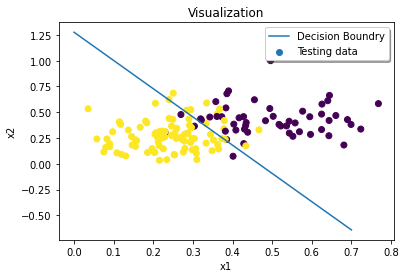

In [7]:
""""P2.2 plot the data and the decision boundary"""
# data visualization
# plot the testing data (x axis: first feature, y axis: second feature), use different colors for the two classes
# on the same figure, plot the decision boundary
# print out the intercept and the slope of the linear decision boundary
# TODO
fig, ax = plt.subplots()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title("Visualization")

inverse = np.linalg.inv(gda.sigma)
constant = 2 * np.log(gda.phi/(1-gda.phi)) + gda.mu[1]@inverse@gda.mu[1].T - gda.mu[0]@inverse@gda.mu[0].T
coef = 2*((gda.mu[1]-gda.mu[0])@inverse)
a1, a2 = coef[0], coef[1]
x_range = np.linspace(0,0.7,100)
y_range = -(a1/a2)*x_range + constant/a2 

ax.plot(x_range, y_range, label = "Decision Boundry")
ax.scatter(test_data[:,0], test_data[:,1], label = "Testing data", c=test_label)

legend = ax.legend(loc="best", shadow=True)

print('The slope is {}'.format(-(a1/a2)))
print('The intercept is {}'.format(constant/a2 ))